# Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1)As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2)Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

3)Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

4)Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5)Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6)Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7)Come up with some initial hypotheses based on your goal of predicting property value.

8)Visualize all combinations of variables in some way.

9)Run the appropriate statistical tests where needed.

10)What independent variables are correlated with the dependent variable, home value?

11)Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12)Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13)Explore your dataset with any other visualizations you think will be helpful.

# random 

In [6]:
""" Number Guessing Game

----------------------------------------

"""

import random
random_number = int(random.randint(1, 10))
attempts_list = []

def show_score():

    if len(attempts_list) <= 0:

        print("There is currently no high score, it's yours for the taking!")

    else:

        print("The current high score is {} attempts".format(min(attempts_list)))

def start_game():

    random_number = int(random.randint(1, 10))

print("Hello traveler! Welcome to the game of guesses!")

player_name = input("What is your name? ")

wanna_play = input("Hi, {}, would you like to play the guessing game? (Enter Yes/No) ".format(player_name))

 # Where the show_score function USED to be

attempts = 0

show_score()

while wanna_play.lower() == "yes":

    try:

        guess = input("Pick a number between 1 and 10 ")

        if int(guess) < 1 or int(guess) > 10:

            raise ValueError("Please guess a number within the given range")

        if int(guess) == random_number:

            print("Nice! You got it!")

            attempts += 1

            attempts_list.append(attempts)

            print("It took you {} attempts".format(attempts))

            play_again = input("Would you like to play again? (Enter Yes/No) ")

            attempts = 0

            show_score()

            random_number = int(random.randint(1, 10))

            if play_again.lower() == "no":

                print("That's cool, have a good one!")

            break

        elif int(guess) > random_number:

            print("It's lower")

            attempts += 1

        elif int(guess) < random_number:

            print("It's higher")
    
            attempts += 1
    
    except ValueError as err:

            print("Oh no!, that is not a valid value. Try again...")

            print("({})".format(err))

    else:
                
                print("That's cool, have a good one!")
    
if __name__ == '__main__':

            start_game()

Hello traveler! Welcome to the game of guesses!
What is your name? cris
Hi, cris, would you like to play the guessing game? (Enter Yes/No) yes
There is currently no high score, it's yours for the taking!
Pick a number between 1 and 10 5
It's higher
That's cool, have a good one!
Pick a number between 1 and 10 8
It's lower
That's cool, have a good one!
Pick a number between 1 and 10 7
Nice! You got it!
It took you 3 attempts
Would you like to play again? (Enter Yes/No) yes
The current high score is 3 attempts


In [22]:
from pydataset import data
import pandas as pd
import numpy as np
import prepare
import acquire 
import features
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing

In [2]:
def split(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

# 1)As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [3]:
train, val, test = prepare.wrangle_zillow()

# 2)Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.



In [4]:
train, val, test = prepare.wrangle_zillow()
train.shape,val.shape,test.shape

((1038959, 7), (445269, 7), (371057, 7))

In [5]:
train.head()

,Bedrooms,Bathrooms,Squarefeet,TaxesTotal,Year,Taxes,Fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037


In [6]:
#impute data 
train, val, test = prepare.impute_mode(train, val, test, 'Squarefeet')

In [7]:
train = features.prepare_zillow(train)
val = features.prepare_zillow(val)
test = features.prepare_zillow(test)

In [8]:
train.head()

,Bedrooms,Bathrooms,Squarefeet,TaxesTotal,Year,Taxes,Fips,Decade
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,6059,1970
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,6037,1950
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,6037,1940
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,6037,1940
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,6037,1980


# 3)Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Bedrooms    1038959 non-null  float64
 1   Bathrooms   1038959 non-null  float64
 2   Squarefeet  1038959 non-null  float64
 3   TaxesTotal  1038959 non-null  float64
 4   Year        1038959 non-null  float64
 5   Taxes       1038959 non-null  float64
 6   Fips        1038959 non-null  object 
 7   Decade      1038959 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 71.3+ MB


In [10]:
cats = ['Bedrooms', 'Bathrooms',  'Year',  'Fips']
nums = ['Squarefeet', 'Taxes', 'TaxesTotal','Decade']

In [11]:
def plot_variable_pairs(df):
    cats = ['Bedrooms', 'Bathrooms',  'Year',  'Fips']
    nums = ['Squarefeet', 'Taxes', 'TaxesTotal','Decade']
    
    # make correlation plot
    train_corr = train.drop(columns=['Fips']).corr()
    plt.figure(figsize=(12,8))
    sns.pairplot(train[nums].sample(1000), corner=True, kind='reg',plot_kws={'line_kws':{'color':'red'}})
    plt.show()

<Figure size 864x576 with 0 Axes>

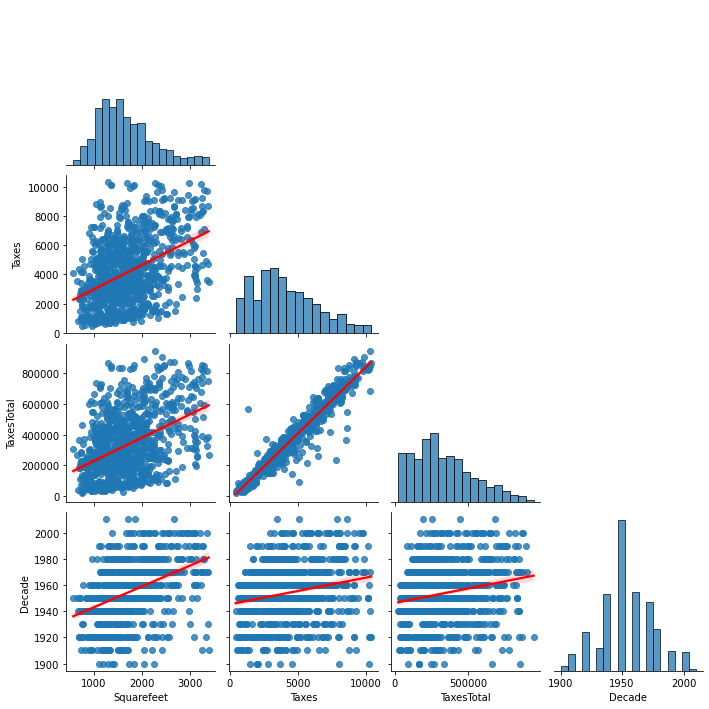

In [12]:
plot_variable_pairs(train)

# 4)Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [ ]:
cats = ['Bedrooms', 'Bathrooms',  'Year',  'Fips']
nums = ['Squarefeet', 'Taxes', 'TaxesTotal','Decade']

In [52]:
def plot_cat_and_cont(df, cat, cont):
    sns.relplot(data=df.sample(150), y='Decade', x=cont, hue=cat)
    plt.show()
    
    sns.relplot(data=df.sample(150), y='Decade', x=cont, hue=cat)
    plt.show()
    
    sns.relplot(data=df.sample(150), y='Decade', x=cont, hue=cat)
    plt.show()

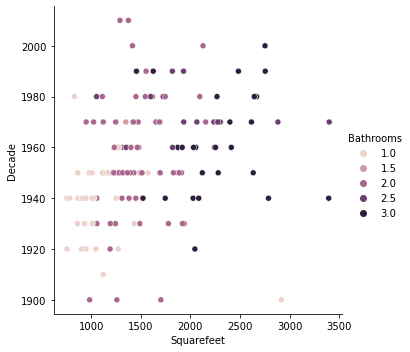

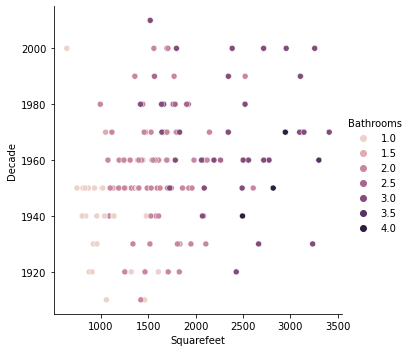

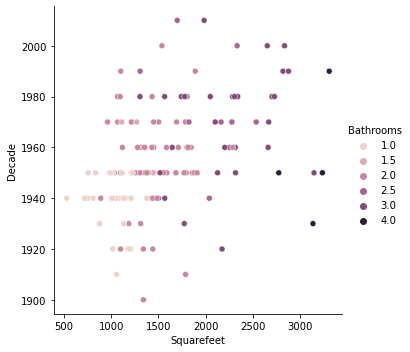

In [53]:
plot_cat_and_cont(train, cat='Bathrooms', cont='Squarefeet')

# 5)Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.



In [14]:
# lmao i need to fine or create a better one 

# 6)Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.



In [15]:
#finish i think 

# 7)Come up with some initial hypotheses based on your goal of predicting property value.



In [16]:
# Is there a relationship between taxes and tax_value?
# is there a different in decade to taxews 
# after 2000 house marker startedt o increse at a intense rate 

# 8)Visualize all combinations of variables in some way.



In [17]:
train.Year.max()

2016.0

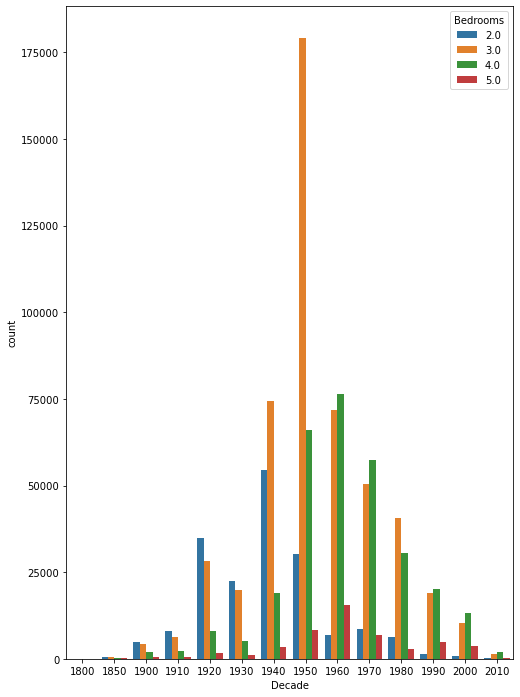

In [14]:
plt.figure(figsize=(8,12))
sns.countplot(data=train, x='Decade', hue='Bedrooms')
plt.title('Does decade effect amount of Bedrooms')
plt.show()

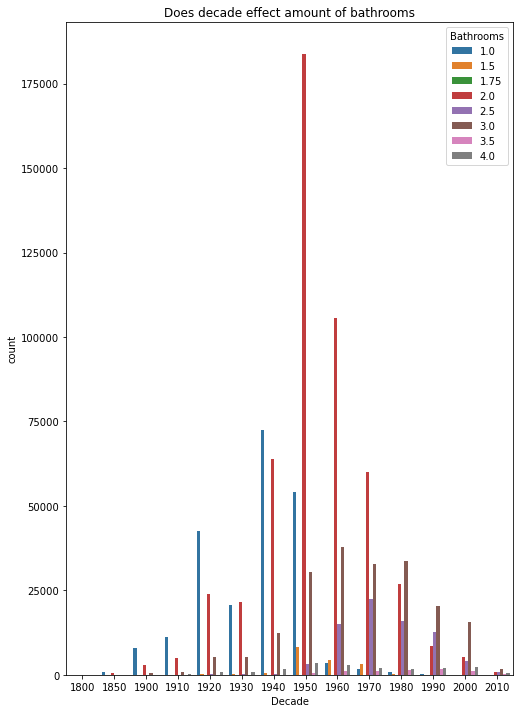

In [21]:
plt.figure(figsize=(8,12))
sns.countplot(data=train, x='Decade', hue='Bathrooms')
plt.title('Does decade effect amount of bathrooms')
plt.show()

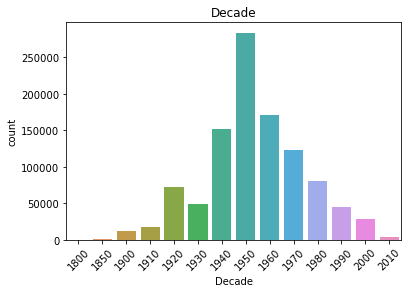

In [20]:
sns.countplot(data=train, x='Decade',)
plt.xticks(rotation=45)
plt.title('Decade')
plt.show()

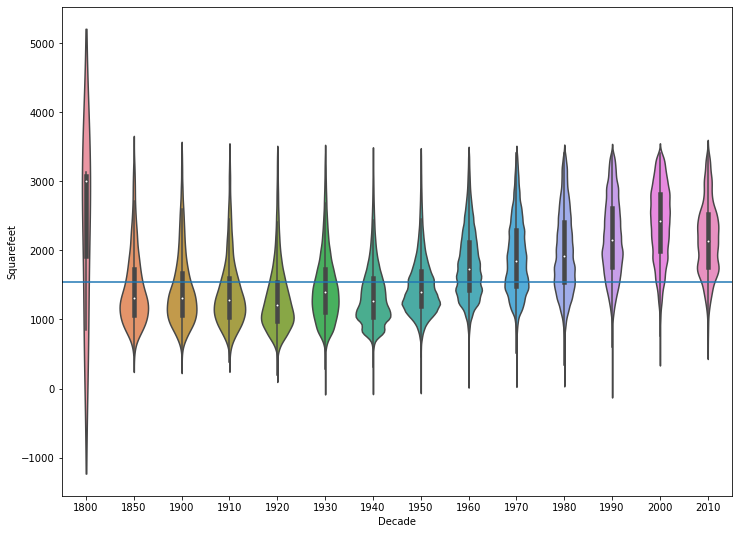

In [66]:
plt.figure(figsize=(12,9))
sns.violinplot(data=train, x='Decade', y='Squarefeet', col='Bedrooms', kind="violin")
plt.axhline(y=train.Squarefeet.median())
plt.show()

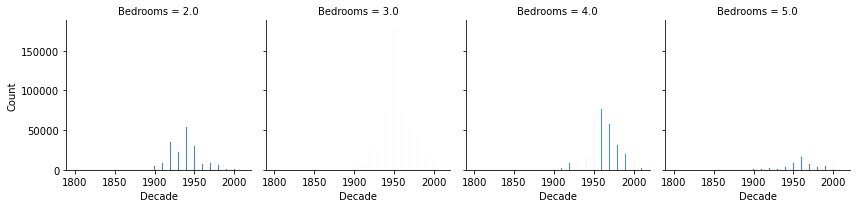

In [34]:
g = sns.FacetGrid(train, col="Bedrooms")
g.map_dataframe(sns.histplot, x="Decade")

# Ask exploratory questions of your data that will help you understand more about the attributes and drivers of home value. Answer questions through charts and statistical tests.

# Hypothesis
`Hypothesis(1):`

Ho-Does more Bed rooms increase the cost of the houses?

Ha-Bed rooms has no effect on pricing of house

`Hypothesis(2):`

Ho-Would the amount of squarefeet effect the cost of housing

Ha-squarefeet as no effect on housing


`Hypothesis(3):`

Ho-Would decade effect total cost of the house 

Ha-Decade has no effect on total cost of market 
